# Injury Plays
Review the injury plays, with video link and plot of each.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
import datetime as dt
from IPython.core.display import display, HTML

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import cmath

pd.set_option('display.max_columns', 50)

import sys
sys.path.insert(0,'../scripts/')

from football_field import create_football_field

%matplotlib inline

In [37]:
vr = pd.read_csv('../input/video_review.csv')
vfi = pd.read_csv('../input/video_footage-injury.csv')
ppd = pd.read_csv('../input/player_punt_data.csv')
gsisid_numbers = ppd.groupby('GSISID')['Number'].apply(lambda x: "%s" % ', '.join(x))
gsisid_numbers = pd.DataFrame(gsisid_numbers).reset_index()
vr_with_number = pd.merge(vr, gsisid_numbers, how='left', suffixes=('','_injured'))
vr_with_number = pd.merge(vr_with_number, gsisid_numbers, how='left', left_on='Primary_Partner_GSISID', right_on='GSISID', suffixes=('','_primary_partner'))
vr = vr_with_number

In [38]:
def compass(angles, radii, arrowprops=None):
    """
    Compass draws a graph that displays the vectors with
    components `u` and `v` as arrows from the origin.

    Examples
    --------
    >>> import numpy as np
    >>> u = [+0, +0.5, -0.50, -0.90]
    >>> v = [+1, +0.5, -0.45, +0.85]
    >>> compass(u, v)
    """

    #angles, radii = cart2pol(u, v)
    
    fig, ax = plt.subplots(subplot_kw=dict(polar=True))

    kw = dict(arrowstyle="->", color='k')
    if arrowprops:
        kw.update(arrowprops)
    [ax.annotate("", xy=(angle, radius), xytext=(0, 0),
                 arrowprops=kw) for
     angle, radius in zip(angles, radii)]

    ax.set_ylim(0, np.max(radii))

    return fig, ax

In [39]:
vr.columns

Index(['Season_Year', 'GameKey', 'PlayID', 'GSISID', 'Player_Activity_Derived',
       'Turnover_Related', 'Primary_Impact_Type', 'Primary_Partner_GSISID',
       'Primary_Partner_Activity_Derived', 'Friendly_Fire', 'Number',
       'GSISID_primary_partner', 'Number_primary_partner'],
      dtype='object')

In [40]:
vr.head()

Season_Year  GameKey  PlayID  GSISID Player_Activity_Derived  \
0         2016        5    3129   31057                Tackling   
1         2016       21    2587   29343                 Blocked   
2         2016       29     538   31023                Tackling   
3         2016       45    1212   33121                Tackling   
4         2016       54    1045   32444                 Blocked   

  Turnover_Related Primary_Impact_Type  Primary_Partner_GSISID  \
0               No      Helmet-to-body                 32482.0   
1               No    Helmet-to-helmet                 31059.0   
2               No      Helmet-to-body                 31941.0   
3               No      Helmet-to-body                 28249.0   
4               No      Helmet-to-body                 31756.0   

  Primary_Partner_Activity_Derived Friendly_Fire   Number  \
0                          Tackled            No  25, 25o   
1                         Blocking            No       86   
2                          Tackled            No       81   
3                          Tackled            No       93   
4                          Blocked           Yes       41   

   GSISID_primary_partner Number_primary_partner  
0                 32482.0                  2, 45  
1                 31059.0            28, 34d, 42  
2                 31941.0                     80  
3                 28249.0         15, 16, 10, 11  
4                 31756.0                39d, 39

In [41]:
vfi = vfi.rename(columns={'season' : 'Season_Year',
                    'gamekey' : 'GameKey',
                    'playid' : 'PlayID'})

Season 2016 - Gamekey 5 - Playid 3129
Injured Player Number: 25, 25o - action Tackling
Primary Partner Player Number: 2, 45 - action Tackled


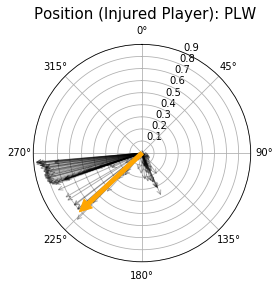

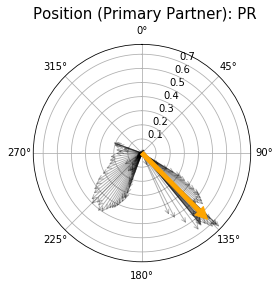

/home/robmulla/anaconda3/envs/kaggle/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


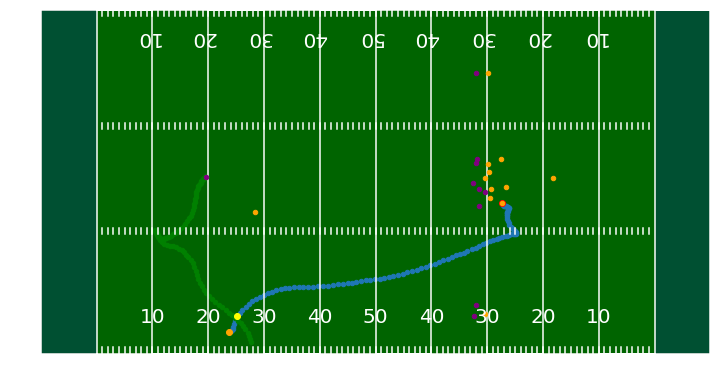

Season 2016 - Gamekey 21 - Playid 2587
Injured Player Number: 86 - action Blocked
Primary Partner Player Number: 28, 34d, 42 - action Blocking


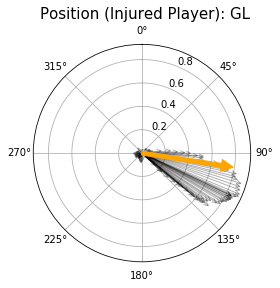

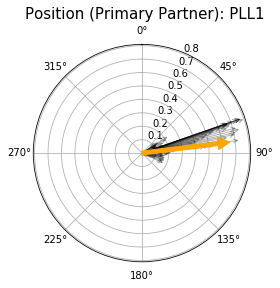

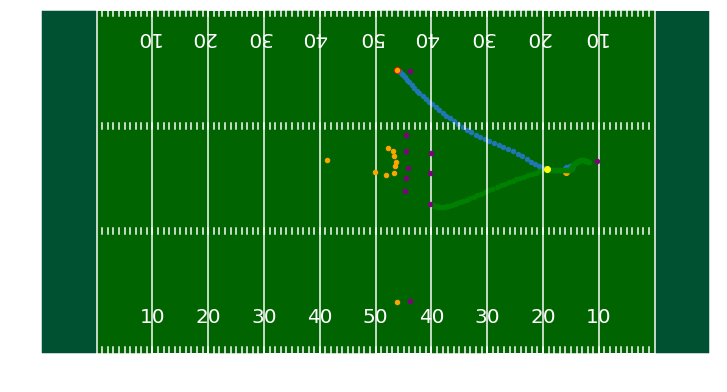

Season 2016 - Gamekey 29 - Playid 538
Injured Player Number: 81 - action Tackling
Primary Partner Player Number: 80 - action Tackled


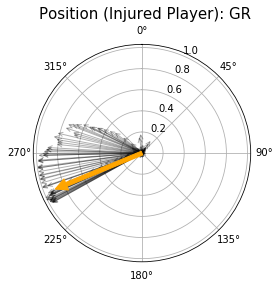

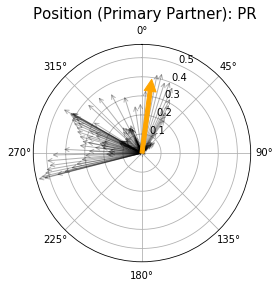

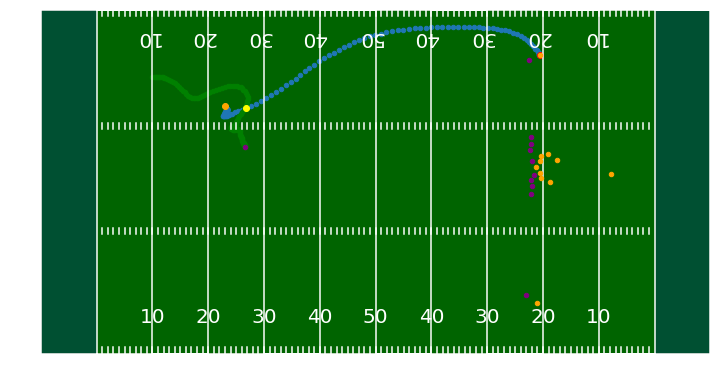

Season 2016 - Gamekey 45 - Playid 1212
Injured Player Number: 93 - action Tackling
Primary Partner Player Number: 15, 16, 10, 11 - action Tackled


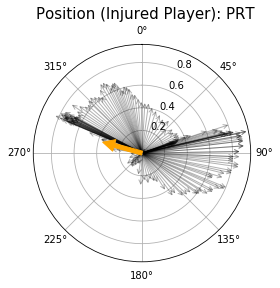

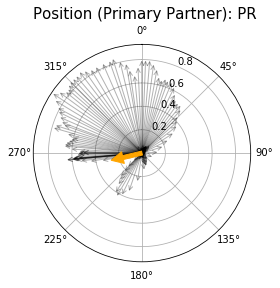

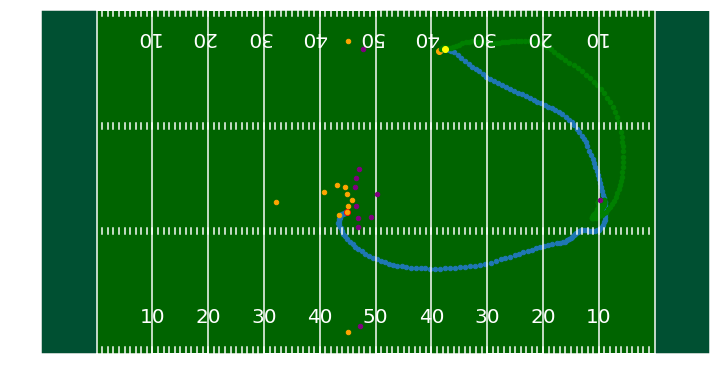

Season 2016 - Gamekey 54 - Playid 1045
Injured Player Number: 41 - action Blocked
Primary Partner Player Number: 39d, 39 - action Blocked


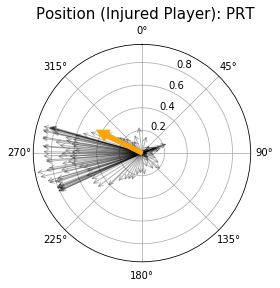

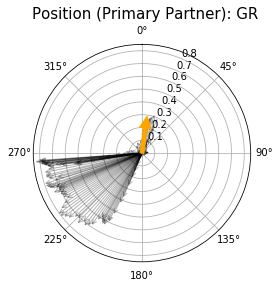

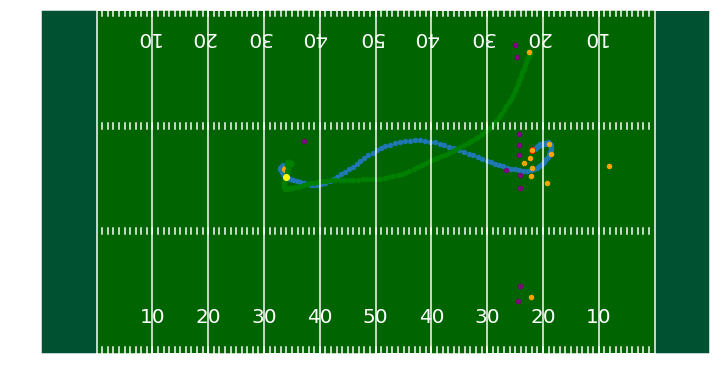

Season 2016 - Gamekey 60 - Playid 905
Injured Player Number: 38 - action Blocking
Primary Partner Player Number: 46d, 51, 47 - action Blocked


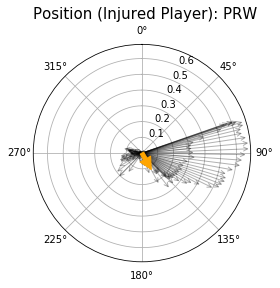

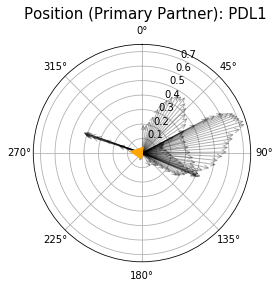

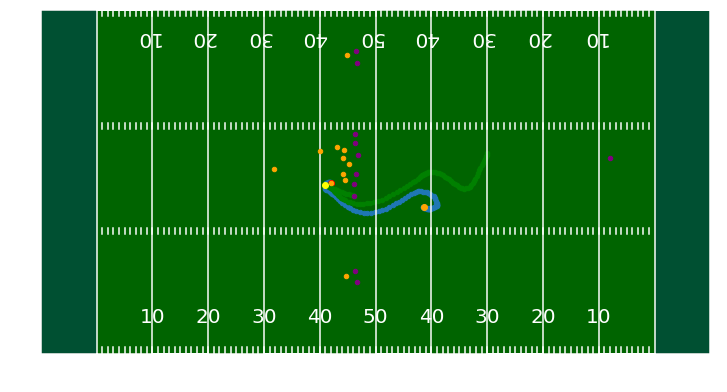

Season 2016 - Gamekey 144 - Playid 2342
Injured Player Number: 36, 33 - action Blocking
Primary Partner Player Number: 57 - action Blocked


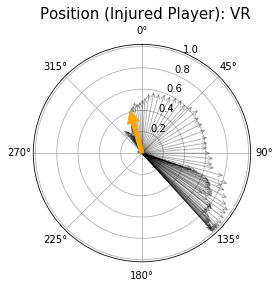

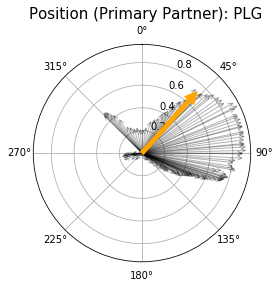

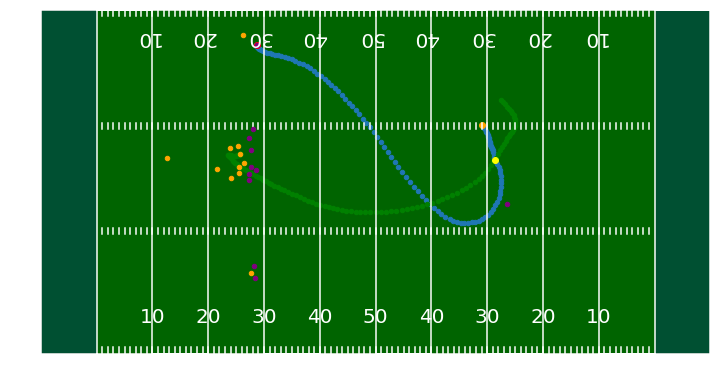

Season 2016 - Gamekey 149 - Playid 3663
Injured Player Number: 42 - action Blocking
Primary Partner Player Number: 54 - action Blocked


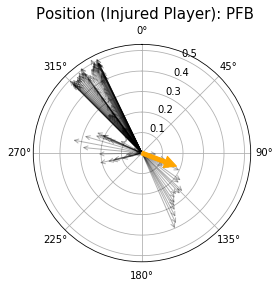

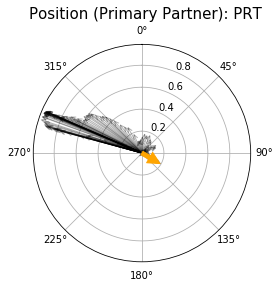

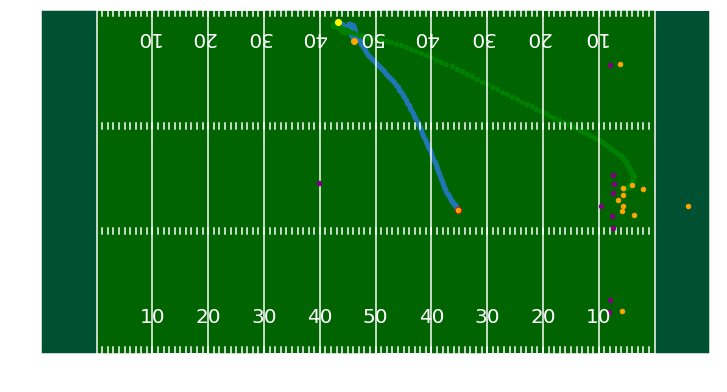

Season 2016 - Gamekey 189 - Playid 3509
Injured Player Number: 81 - action Tackled
Primary Partner Player Number: 58, 57 - action Tackling


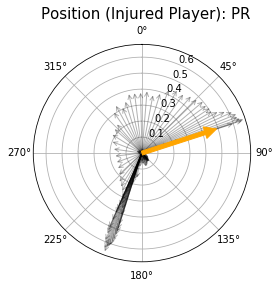

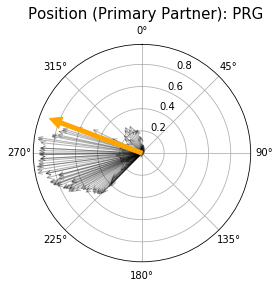

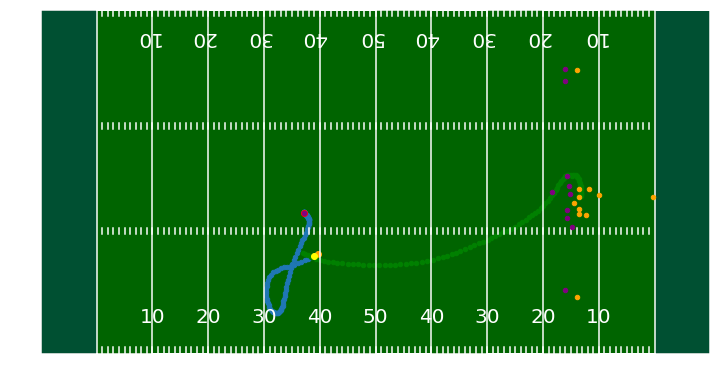

Season 2016 - Gamekey 218 - Playid 3468
Injured Player Number: 89 - action Blocked
Primary Partner Player Number: nan - action nan


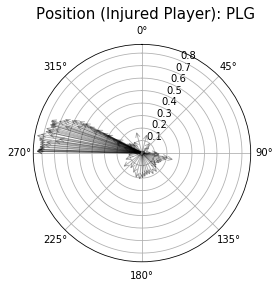

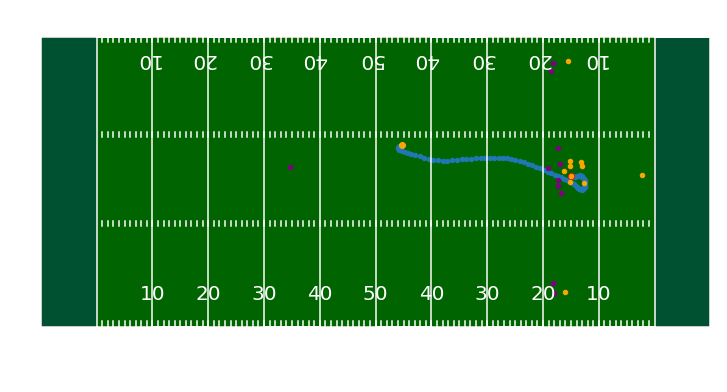

Season 2016 - Gamekey 231 - Playid 1976
Injured Player Number: 81 - action Blocked
Primary Partner Player Number: 42 - action Blocked


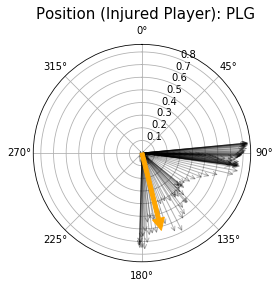

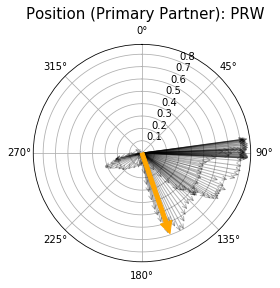

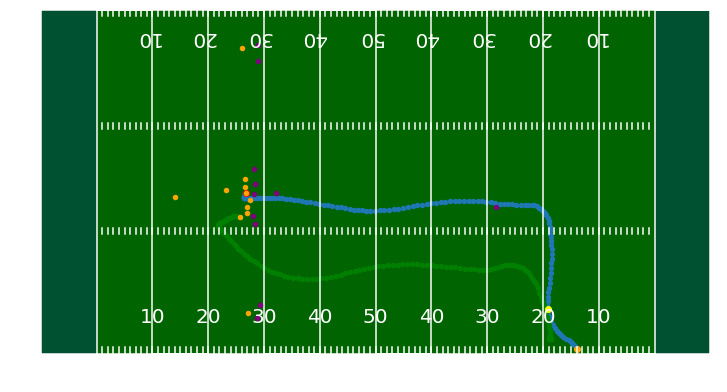

Season 2016 - Gamekey 234 - Playid 3278
Injured Player Number: 94 - action Tackling
Primary Partner Player Number: 21, 23 - action Tackled


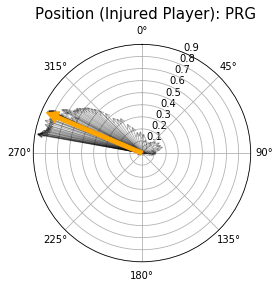

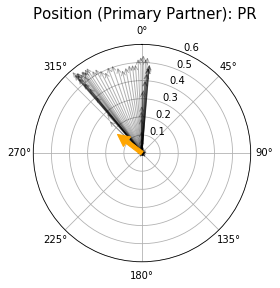

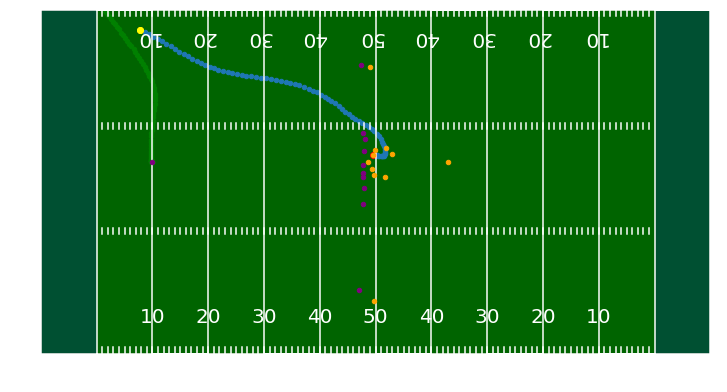

Season 2016 - Gamekey 266 - Playid 2902
Injured Player Number: 43 - action Tackled
Primary Partner Player Number: 22d, 22 - action Tackling


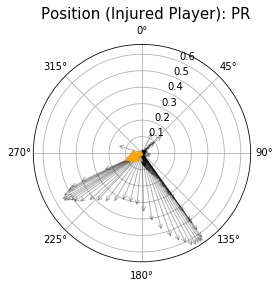

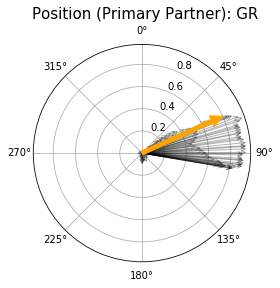

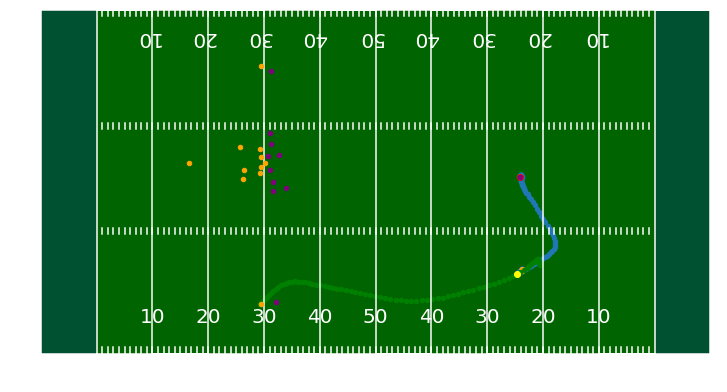

Season 2016 - Gamekey 274 - Playid 3609
Injured Player Number: 9 - action Tackled
Primary Partner Player Number: 32 - action Tackling


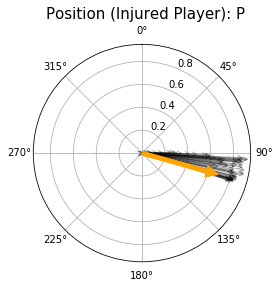

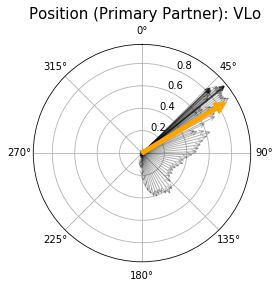

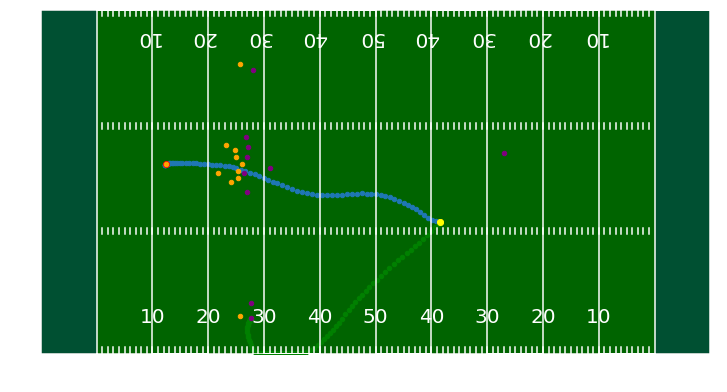

Season 2016 - Gamekey 280 - Playid 2918
Injured Player Number: 87, 85 - action Blocking
Primary Partner Player Number: 89 - action Blocked


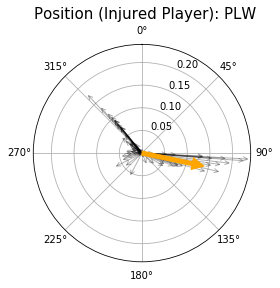

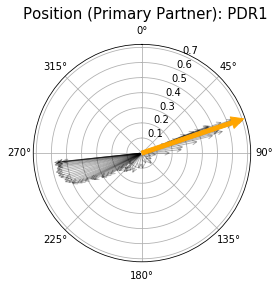

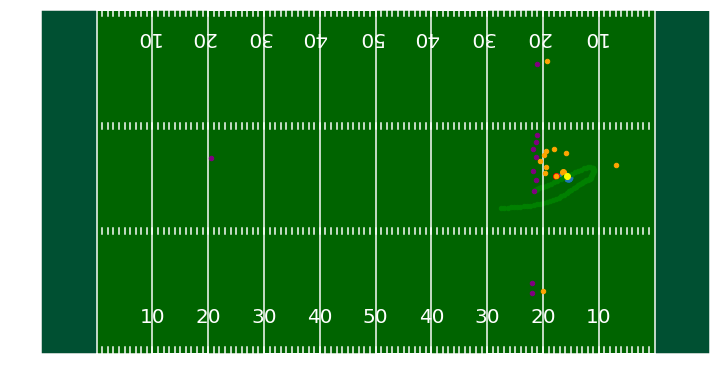

Season 2016 - Gamekey 280 - Playid 3746
Injured Player Number: 17 - action Tackling
Primary Partner Player Number: 15 - action Tackled


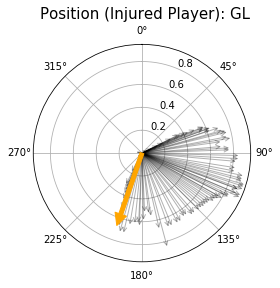

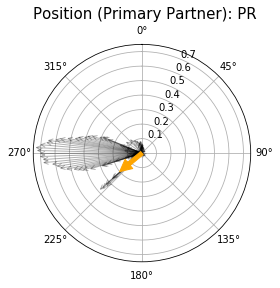

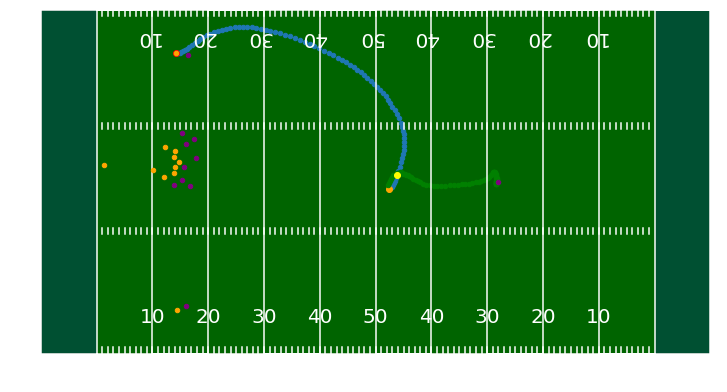

Season 2016 - Gamekey 281 - Playid 1526
Injured Player Number: 89 - action Blocked
Primary Partner Player Number: 26 - action Tackling


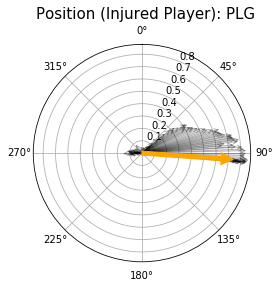

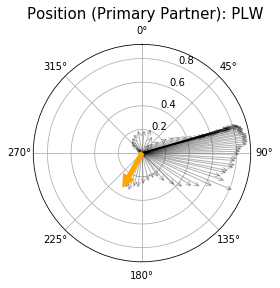

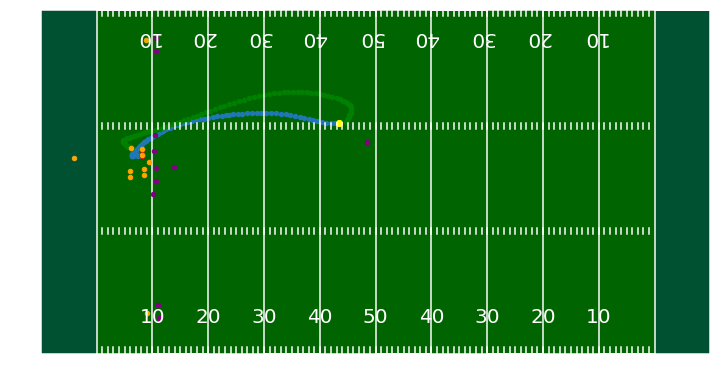

Season 2016 - Gamekey 289 - Playid 2341
Injured Player Number: 47d, 47 - action Blocked
Primary Partner Player Number: 52 - action Blocking


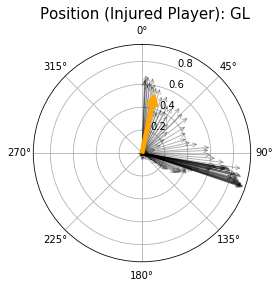

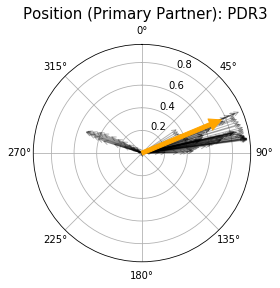

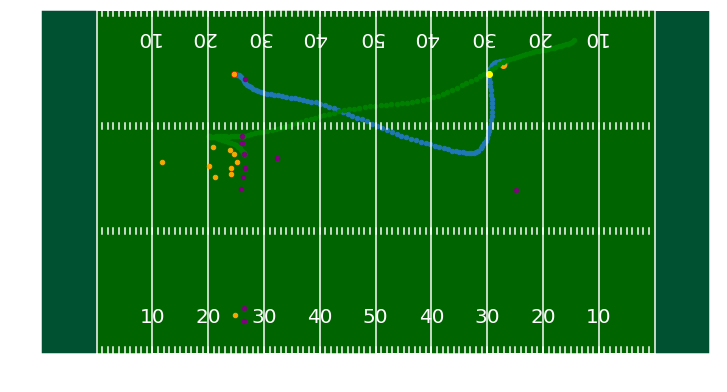

Season 2016 - Gamekey 296 - Playid 2667
Injured Player Number: 36 - action Tackling
Primary Partner Player Number: 24, 37, 32D - action Tackling


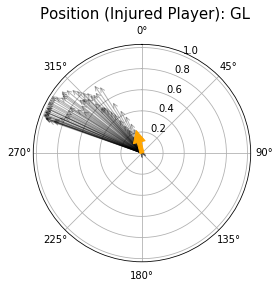

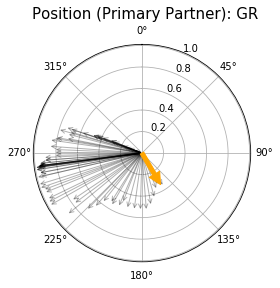

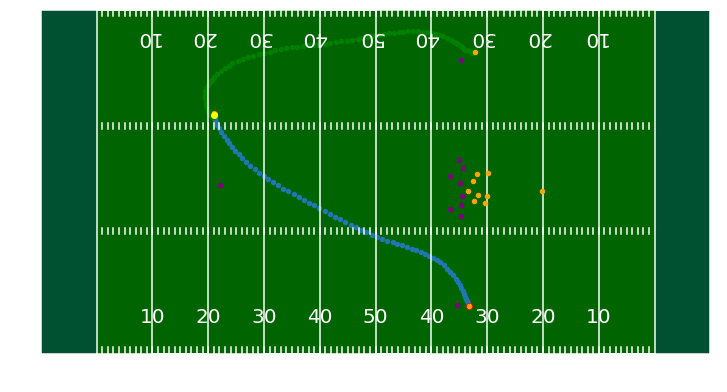

Season 2017 - Gamekey 357 - Playid 3630
Injured Player Number: 85, 86 - action Tackling
Primary Partner Player Number: 31, 38, 43 - action Tackled


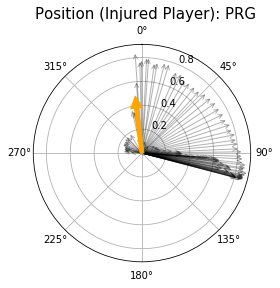

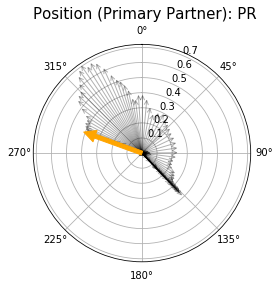

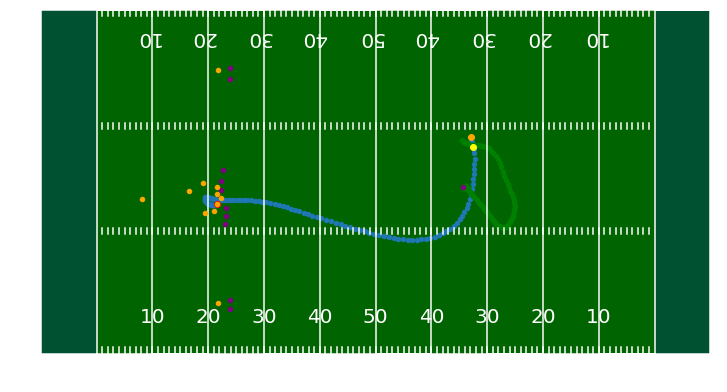

Season 2017 - Gamekey 364 - Playid 2489
Injured Player Number: 58, 59, 52 - action Blocked
Primary Partner Player Number: 43d, 45, 43, 45d - action Blocking


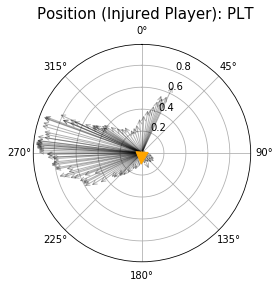

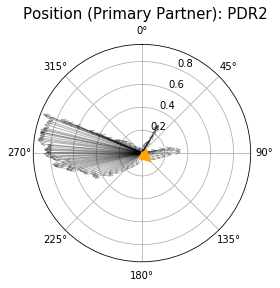

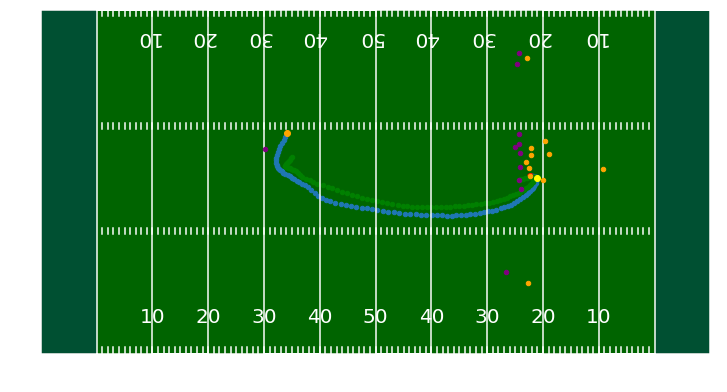

Season 2017 - Gamekey 364 - Playid 2764
Injured Player Number: 39, 45, 49d - action Blocked
Primary Partner Player Number: 48 - action Blocking


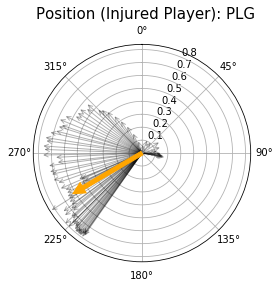

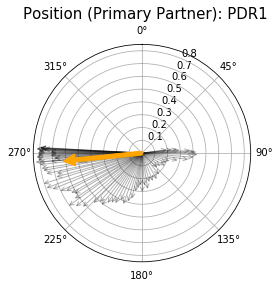

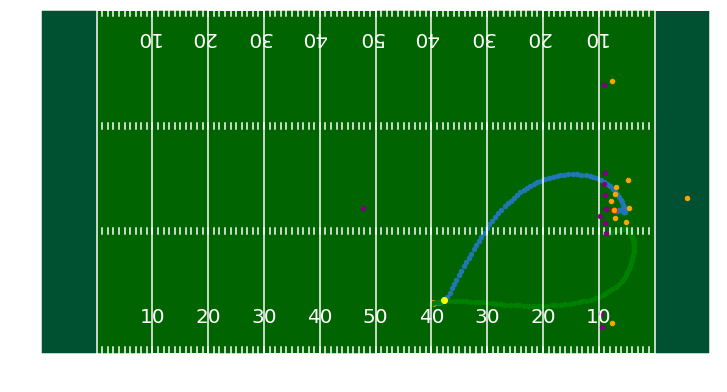

Season 2017 - Gamekey 384 - Playid 183
Injured Player Number: 35, 35d - action Tackling
Primary Partner Player Number: 53 - action Tackling


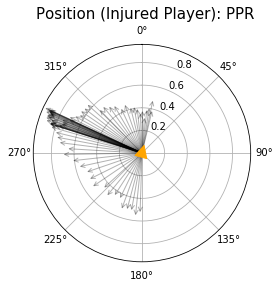

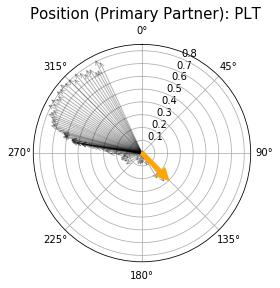

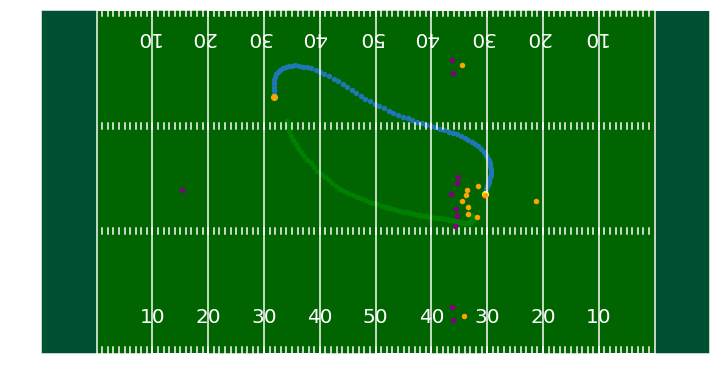

Season 2017 - Gamekey 392 - Playid 1088
Injured Player Number: 59, 49 - action Blocked
Primary Partner Player Number: 59, 53, 51 - action Blocking


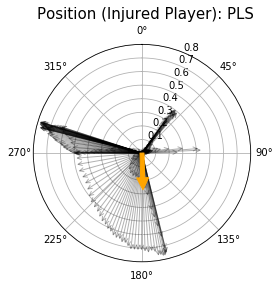

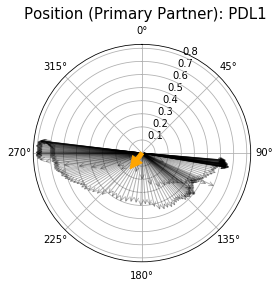

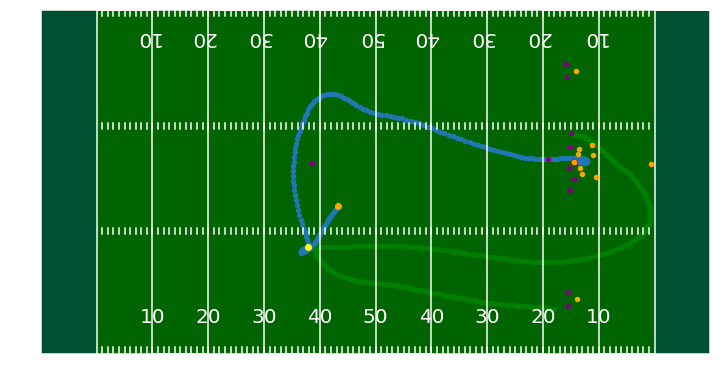

Season 2017 - Gamekey 397 - Playid 1526
Injured Player Number: 53, 49 - action Tackling
Primary Partner Player Number: 14 - action Tackled


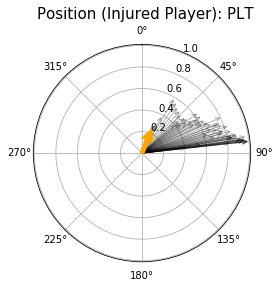

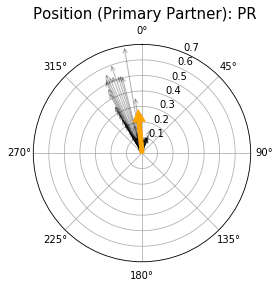

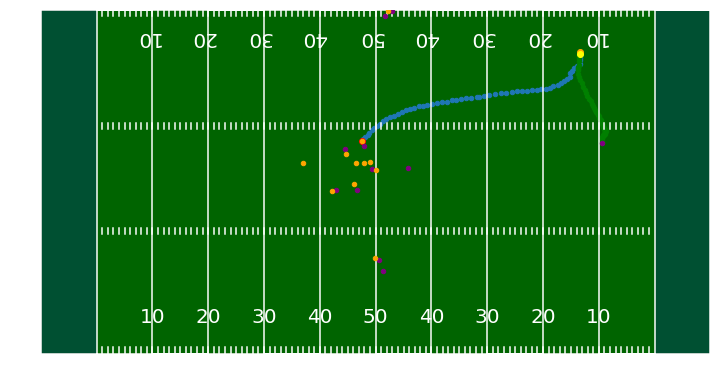

Season 2017 - Gamekey 399 - Playid 3312
Injured Player Number: 80 - action Tackled
Primary Partner Player Number: 51 - action Tackling


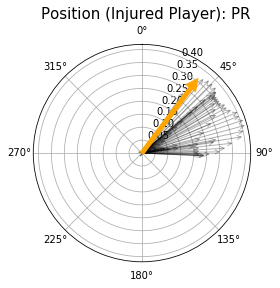

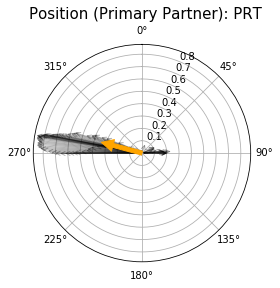

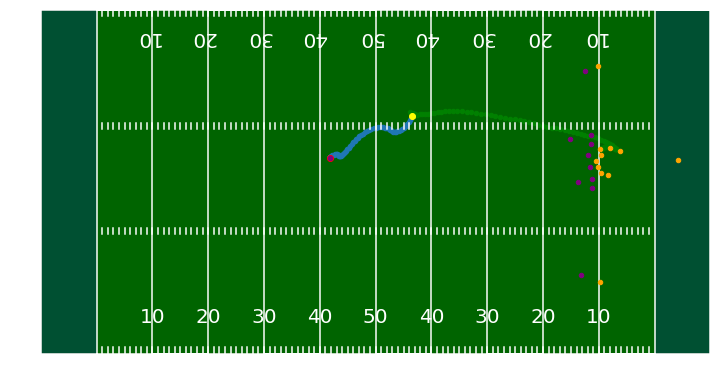

Season 2017 - Gamekey 414 - Playid 1262
Injured Player Number: 03d, 3, 25 - action Tackling
Primary Partner Player Number: nan - action nan


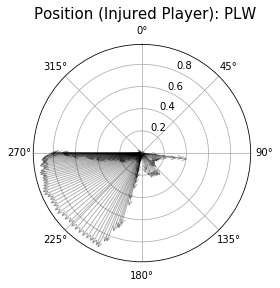

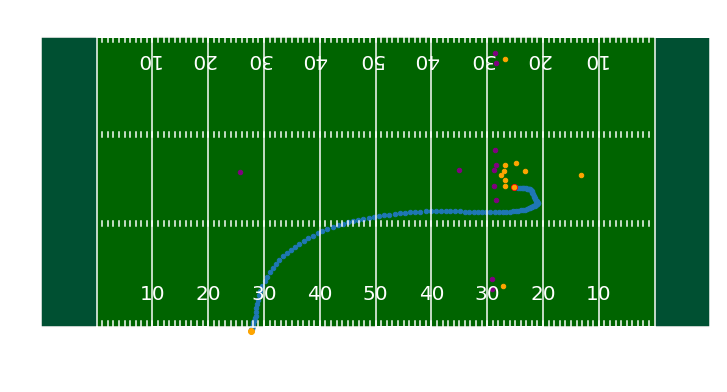

Season 2017 - Gamekey 448 - Playid 2792
Injured Player Number: 33 - action Blocking
Primary Partner Player Number: 78 - action Blocked


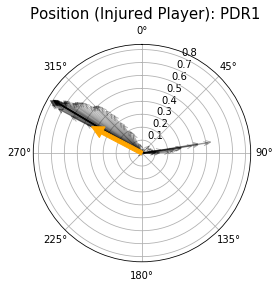

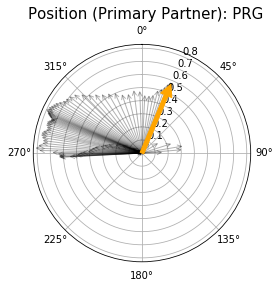

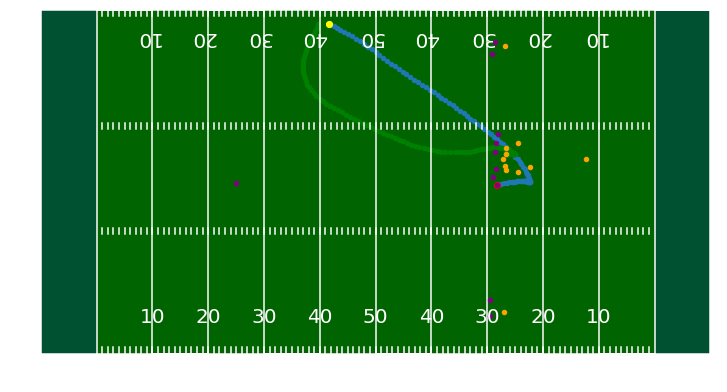

Season 2017 - Gamekey 473 - Playid 2072
Injured Player Number: 49 - action Tackling
Primary Partner Player Number: 50, 35 - action Tackling


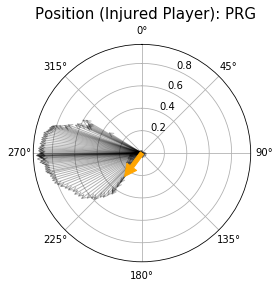

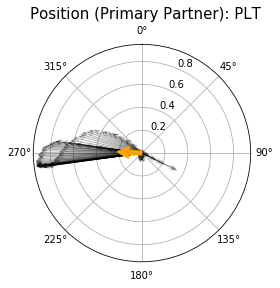

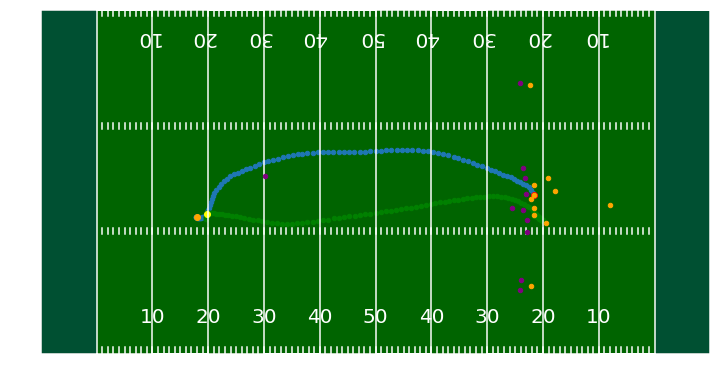

Season 2017 - Gamekey 506 - Playid 1988
Injured Player Number: 21 - action Tackled
Primary Partner Player Number: nan - action Tackling


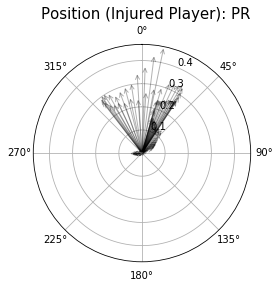

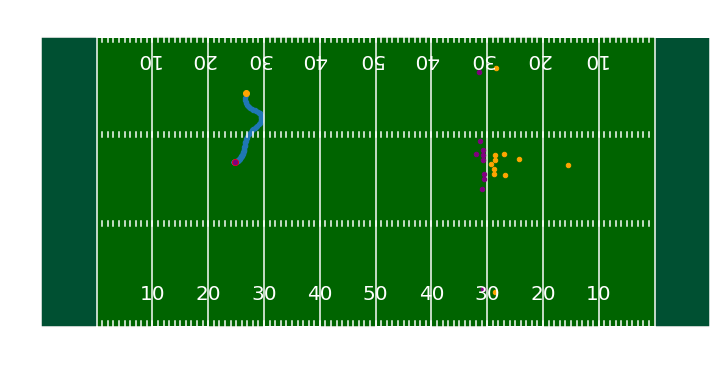

Season 2017 - Gamekey 553 - Playid 1683
Injured Player Number: 48, 62d, 62 - action Blocking
Primary Partner Player Number: 51 - action Blocked


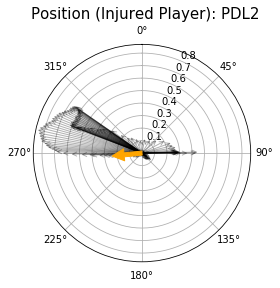

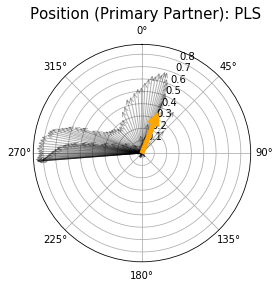

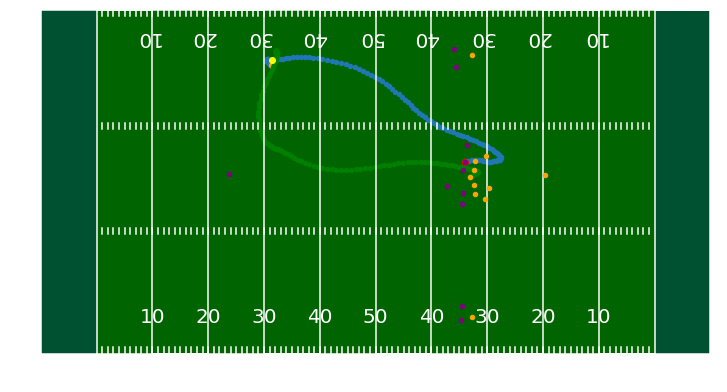

Season 2017 - Gamekey 567 - Playid 1407
Injured Player Number: 38, 32 - action Blocking
Primary Partner Player Number: 26 - action Blocked


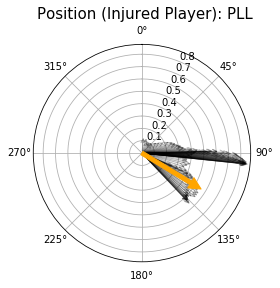

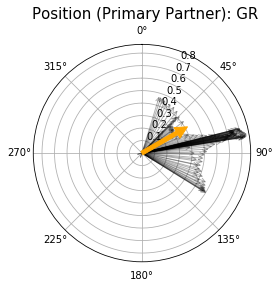

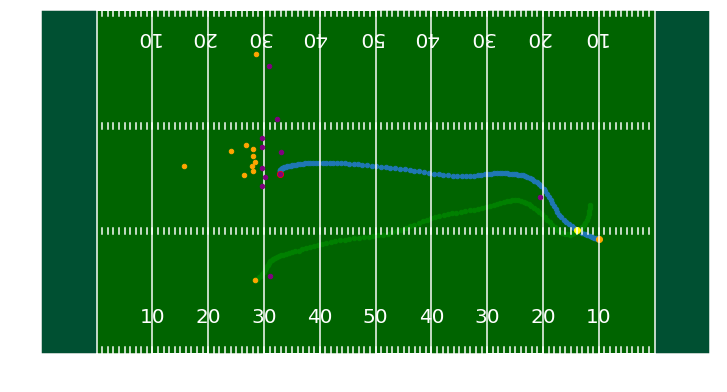

Season 2017 - Gamekey 585 - Playid 2208
Injured Player Number: 13 - action Tackled
Primary Partner Player Number: 14 - action Tackling


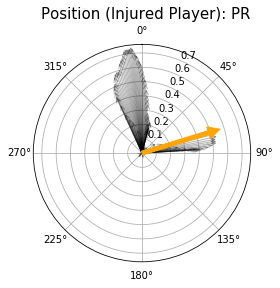

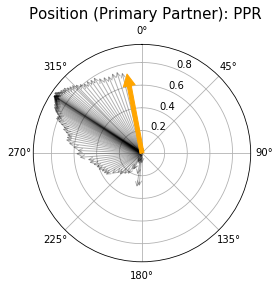

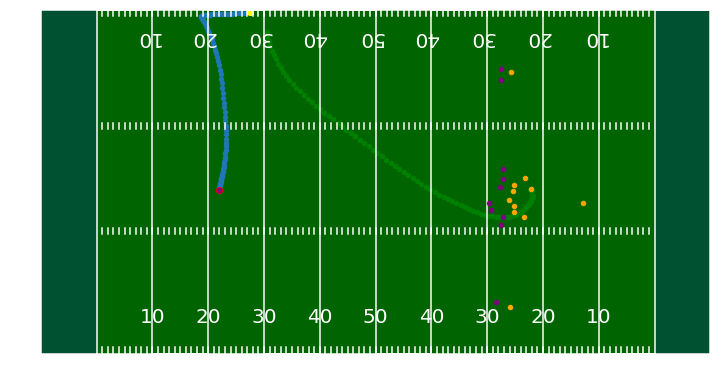

Season 2017 - Gamekey 585 - Playid 733
Injured Player Number: 53, 44 - action Blocked
Primary Partner Player Number: nan - action Unclear


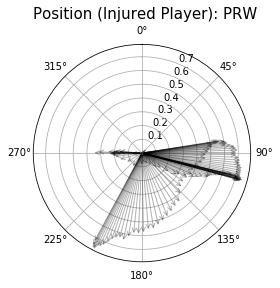

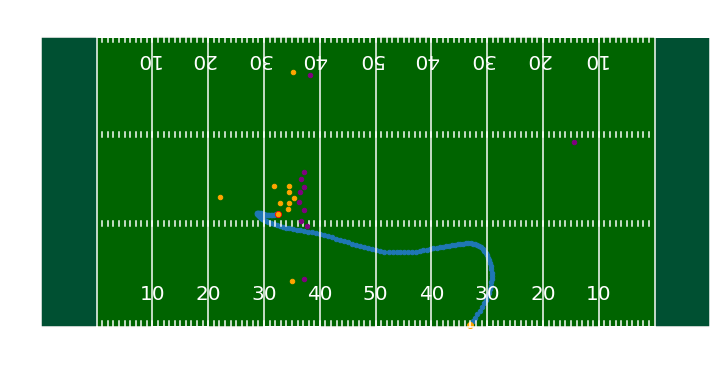

Season 2017 - Gamekey 601 - Playid 602
Injured Player Number: 43, 42 - action Tackling
Primary Partner Player Number: 87 - action Tackled


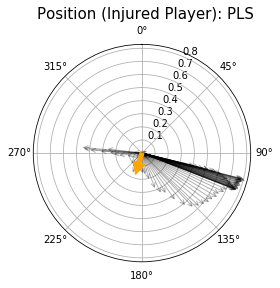

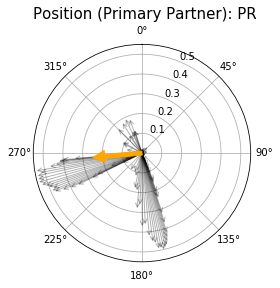

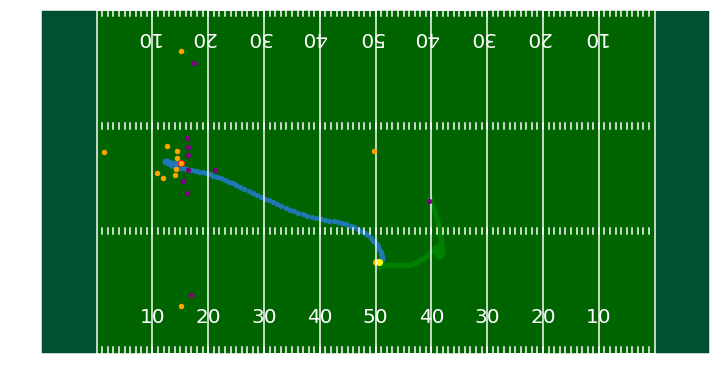

Season 2017 - Gamekey 607 - Playid 978
Injured Player Number: 85, 86 - action Blocking
Primary Partner Player Number: 48, 53, 48d - action Blocked


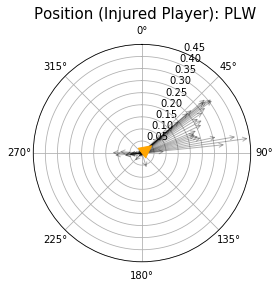

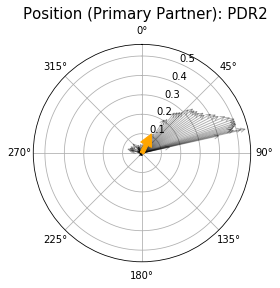

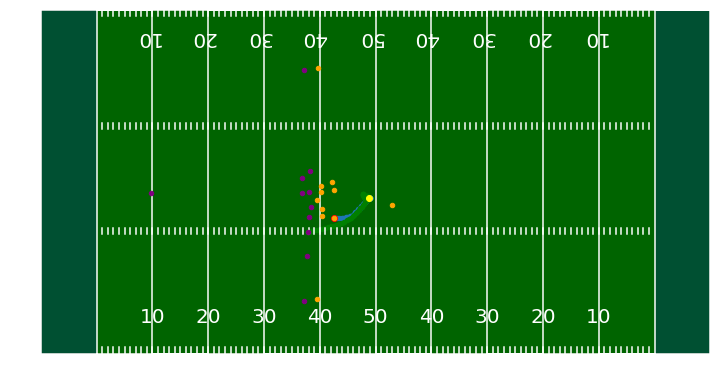

Season 2017 - Gamekey 618 - Playid 2792
Injured Player Number: 58, 57 - action Tackling
Primary Partner Player Number: 58 - action Blocking


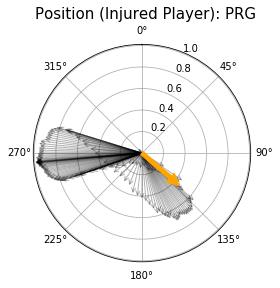

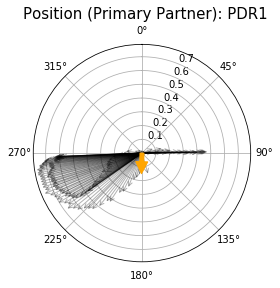

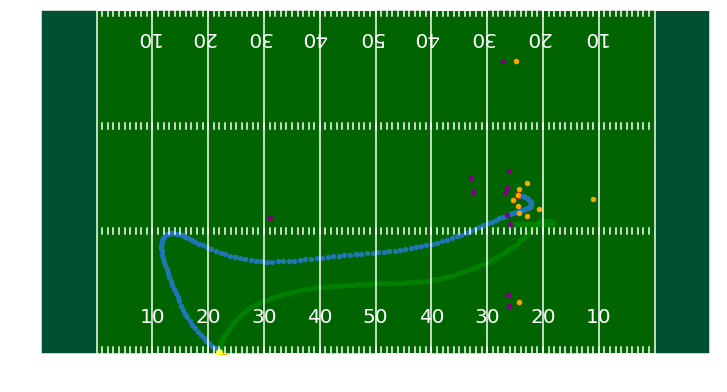

In [45]:
for play_info in vr.iterrows():
    gamekey = play_info[1]['GameKey']
    season_year = play_info[1]['Season_Year']
    playid = play_info[1]['PlayID']
    
    vr_thisplay = vr.loc[(vr['Season_Year'] == season_year) &
           (vr['PlayID'] == playid) &
           (vr['GameKey'] == gamekey)]
    
    print('Season {} - Gamekey {} - Playid {}'.format(season_year, gamekey, playid))
    print('Injured Player Number: {} - action {}'.format(vr_thisplay['Number'].values[0],
                                                         vr_thisplay['Player_Activity_Derived'].values[0]))
    print('Primary Partner Player Number: {} - action {}'.format(vr_thisplay['Number_primary_partner'].values[0],
                                                                 vr_thisplay['Primary_Partner_Activity_Derived'].values[0]))

    play = pd.read_csv('../working/playlevel/during_play/{}-{}-{}.csv'.format(season_year, gamekey, playid))
    play['dir_theta'] = play['dir'] * np.pi / 180

    # Video footage link
    url_link = vfi.loc[(vfi['Season_Year'] == season_year) &
        (vfi['PlayID'] == playid) &
        (vfi['GameKey'] == gamekey)]['PREVIEW LINK (5000K)'].values[0]
    display(HTML("""<a href="{}">PLAY-URL-LINK</a>""".format(url_link)))

    # Determine time of injury
    injured = play.loc[play['injured_player']]
    primarypartner = play.loc[play['primary_partner_player']]
    
    if len(primarypartner) != 0:
        inj_and_pp = pd.merge(injured[['time','x','y']], primarypartner[['time','x','y']], on='time', suffixes=('_inj','_pp'))
        inj_and_pp['dis_from_eachother'] = np.sqrt(np.square(inj_and_pp['x_inj'] -
                                                             inj_and_pp['x_pp']) +
                                                   np.square(inj_and_pp['y_inj'] - 
                                                             inj_and_pp['y_pp']))
        injury_time = inj_and_pp.sort_values('dis_from_eachother')['time'].values[0]

    # Plot injured player compass
    d = play.loc[play['injured_player']]
    role = d.role.values[0]
    fig, ax1 = compass(d['dir_theta'], d['dis'], arrowprops={'alpha':0.3})
    ax1.set_theta_zero_location("N")
    ax1.set_theta_direction(-1)
    # Color point of time when inujury happened
    if len(primarypartner) != 0:
        theta_at_inj = d.loc[d['time'] == injury_time]['dir_theta'].values[0]
        dis_at_inj = d.loc[d['time'] == injury_time]['dis'].values[0]
        ax1.annotate("", xy=(theta_at_inj,dis_at_inj), xytext=(0, 0), arrowprops={'color': 'orange'}) #use cir mean
    plt.suptitle('Position (Injured Player): {}'.format(role), x=0.52, y=1.01, fontsize=15)

    if len(primarypartner) != 0:
        # Plot primary partner compass
        d = play.loc[play['primary_partner_player']]
        role = d.role.values[0]
        fig, ax2 = compass(d['dir_theta'], d['dis'], arrowprops={'alpha':0.3})
        ax2.set_theta_zero_location("N")
        ax2.set_theta_direction(-1)
        # Color point of time when inujury happened
        theta_at_inj = d.loc[d['time'] == injury_time]['dir_theta'].values[0]
        dis_at_inj = d.loc[d['time'] == injury_time]['dis'].values[0]
        ax2.annotate("", xy=(theta_at_inj,dis_at_inj), xytext=(0, 0), arrowprops={'color': 'orange'}) #use cir mean
        plt.suptitle('Position (Primary Partner): {}'.format(role), x=0.52, y=1.01, fontsize=15)
        plt.show()

    #### PLOT
    fig, ax3 = create_football_field()
    # Plot path
    d = play.loc[play['injured_player']]
    d.plot('x', 'y', kind='scatter', ax=ax3,  zorder=2) #Plot injured player path
    play.loc[(play['punting_returning_team'] == 'Returning_Team') &
             (play['event'] == 'ball_snap')].plot('x', 'y', alpha=1, kind='scatter',
                                                  color='purple', ax=ax3, zorder=3, style='+')
    play.loc[(play['punting_returning_team'] == 'Punting_Team')  &
             (play['event'] == 'ball_snap')].plot('x', 'y', alpha=1, kind='scatter',
                                                  color='orange', ax=ax3, zorder=3, style='+')
    start_pos = d.loc[d['time'] == d['time'].min()]
    ax3.scatter(start_pos['x'], start_pos['y'], color='red',  zorder=2)
    end_pos = d.loc[d['time'] == d['time'].max()]
    ax3.scatter(end_pos['x'], end_pos['y'], color='orange',  zorder=2)
    inj_pos = d.loc[d['time'] == injury_time]
    if len(primarypartner) != 0:
        play.loc[play['primary_partner_player']].plot('x', 'y', kind='scatter',
                                                      xlim = (0, 120), ylim=(0,53.3),
                                                      ax=ax3, color='green', zorder=2)
        ax3.scatter(inj_pos['x'], inj_pos['y'], color='yellow',  zorder=2)

    plt.show()